In [14]:
import numpy as np  #does mathematical operation
import matplotlib.pyplot as plt #For plotting the graphs
import pandas as pd #making the data frames and import the csv files
import math
import random

In [15]:
from google.colab import drive #to import the google drive data

In [16]:
drive.mount('/content/drive')   # to mount the drive data into the colab cloud and enter the activation code

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
cd /content/drive/"My Drive/ML nishit sir/Ass2 Logistic Regression" 

/content/drive/My Drive/ML nishit sir/Ass2 Logistic Regression


In [18]:
dataset = pd.read_csv("HR_comma_sep.csv")
print(dataset)

       satisfaction_level  last_evaluation  ...  Department  salary
0                    0.38             0.53  ...       sales     low
1                    0.80             0.86  ...       sales  medium
2                    0.11             0.88  ...       sales  medium
3                    0.72             0.87  ...       sales     low
4                    0.37             0.52  ...       sales     low
...                   ...              ...  ...         ...     ...
14994                0.40             0.57  ...     support     low
14995                0.37             0.48  ...     support     low
14996                0.37             0.53  ...     support     low
14997                0.11             0.96  ...     support     low
14998                0.37             0.52  ...     support     low

[14999 rows x 10 columns]


In [19]:
dataset.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [20]:
dataset.shape

(14999, 10)

In [21]:
X=dataset.iloc[:,:-4].values
y=dataset.iloc[:,-4:-3].values

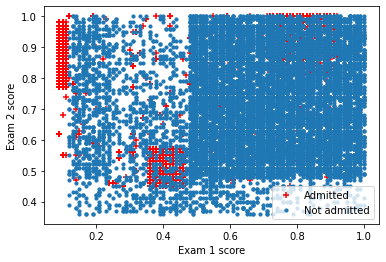

In [22]:
pos , neg = (y==1).reshape(14999,1) , (y==0).reshape(14999,1)
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="+")
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],marker="o",s=10)
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(["Admitted","Not admitted"],loc=0)

In [23]:
def sigmoid(z):    #the sigmoid function that differentiates logistic regression from linear regression
    """
    return the sigmoid of z
    """
    
    return 1/ (1 + np.exp(-z))
# testing the sigmoid function
sigmoid(0)

0.5

In [24]:
def costFunction(theta, X, y):            ##https://www.internalpointers.com/post/cost-function-logistic-regression
    """
    Takes in numpy array theta, x and y and return the logistic regression cost function and gradient
    """
    
    m=len(y)
    
    predictions = sigmoid(np.dot(X,theta))          
    error = (-y * np.log(predictions)) - ((1-y)*np.log(1-predictions))

    cost = 1/m * sum(error)
    
    grad = 1/m * np.dot(X.transpose(),(predictions - y))
    
    return cost[0] , grad

In [25]:
X.shape

(14999, 6)

In [27]:
m , n = X.shape[0], X.shape[1]
X, X_mean, X_std = featureNormalization(X)
X= np.append(np.ones((m,1)),X,axis=1)      #axis=1 is direction along column and axis 0 is direction along row
y=y.reshape(m,1)
initial_theta = np.zeros((n+1,1))
cost, grad= costFunction(initial_theta,X,y)
print("Cost of initial theta is",cost)
print("Gradient at initial theta (zeros):",grad)

Cost of initial theta is 0.6931471805600756
Gradient at initial theta (zeros): [[ 0.26191746]
 [ 0.16541275]
 [-0.002797  ]
 [-0.0101312 ]
 [-0.03036192]
 [-0.0616812 ]
 [ 0.06585488]]


In [26]:
def featureNormalization(X):
    """
    Take in numpy array of X values and return normalize X values,
    the mean and standard deviation of each feature
    """
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    
    X_norm = (X - mean)/std
    
    return X_norm , mean , std

In [28]:
def gradientDescent(X,y,theta,alpha,num_iters):
    """
    Take in numpy array X, y and theta and update theta by taking num_iters gradient steps
    with learning rate of alpha
    
    return theta and the list of the cost of theta during each iteration
    """
    
    m=len(y)
    J_history =[]
    
    for i in range(num_iters):
        cost, grad = costFunction(theta,X,y)
        theta = theta - (alpha * grad)
        J_history.append(cost)
    
    return theta , J_history

In [29]:
theta , J_history = gradientDescent(X,y,initial_theta,0.5,800)

In [30]:
theta

array([[-1.50263781],
       [-1.02761333],
       [ 0.13436224],
       [-0.37702344],
       [ 0.21739686],
       [ 0.30946106],
       [-0.52979911]])

In [31]:
J_history

[0.6931471805600756,
 0.644015531319206,
 0.6067725179285562,
 0.5782621881232467,
 0.5561593543220398,
 0.5387913504608798,
 0.5249616342100721,
 0.5138103904866055,
 0.5047137638107132,
 0.4972136318377004,
 0.4909692426797152,
 0.4857238904790406,
 0.48128179279510824,
 0.47749188296059586,
 0.4742363169817643,
 0.4714222247246985,
 0.4689757181998448,
 0.46683748847093653,
 0.4649595338465556,
 0.4633027029629017,
 0.4618348313780236,
 0.4605293150272595,
 0.459364008474123,
 0.4583203669389645,
 0.4573827729426586,
 0.4565380039474083,
 0.4557748085446018,
 0.45508356684018664,
 0.45445601661693497,
 0.45388503123120055,
 0.45336443846043867,
 0.45288887196320426,
 0.4524536488615491,
 0.4520546683626538,
 0.45168832741497517,
 0.4513514502255266,
 0.45104122911042893,
 0.4507551746545039,
 0.4504910735506929,
 0.45024695280244564,
 0.4500210492190169,
 0.44981178333105976,
 0.4496177370115243,
 0.44943763421376853,
 0.4492703243413767,
 0.4491147678471115,
 0.4489700237263013,
 0

Text(0.5, 1.0, 'Cost function using Gradient Descent')

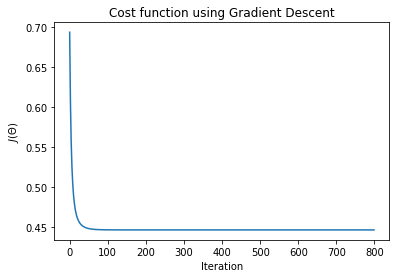

In [32]:
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")